### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

#### STEP - 1 : Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### STEP - 2 : Load the Dataset 
You can get the dataset here : https://bit.ly/3i4rbWl

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
print(df.shape)
df.head()

(9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### STEP - 3:  Removing negative values and explore the data

In [3]:
df1 = df[df['Profit'] >= 0]

In [4]:
df1.shape

(8123, 13)

In [5]:
df1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694


In [6]:
df1.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

So there are no null values in the dataset. So our cleaning part has been done.
Now we will find some stats regarding this dataset. As stats only applies to numeric data, we will create other dataframe which consists of only nueric values

In [7]:
df2 = df1._get_numeric_data()

In [8]:
df2.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.960,2,0.0,41.9136
1,42420,731.940,3,0.0,219.5820
2,90036,14.620,2,0.0,6.8714
4,33311,22.368,2,0.2,2.5164
5,90032,48.860,7,0.0,14.1694


Now in this dataframe we have only numeric variables and also we dont need Postal code, as it is no where related to stats.
So lets drop that column

In [9]:
df3 = df2.drop(['Postal Code'], axis=1)

In [10]:
df3.head()

,Sales,Quantity,Discount,Profit
0,261.960,2,0.0,41.9136
1,731.940,3,0.0,219.5820
2,14.620,2,0.0,6.8714
4,22.368,2,0.2,2.5164
5,48.860,7,0.0,14.1694


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8123 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     8123 non-null   float64
 1   Quantity  8123 non-null   int64  
 2   Discount  8123 non-null   float64
 3   Profit    8123 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 317.3 KB


In [12]:
df3.describe()

,Sales,Quantity,Discount,Profit
count,8123.000000,8123.000000,8123.000000,8123.000000
mean,225.100789,3.795765,0.081417,54.478433
std,600.056721,2.244043,0.099192,212.913326
min,0.990000,1.000000,0.000000,0.000000
25%,17.940000,2.000000,0.000000,5.193000
50%,51.750000,3.000000,0.000000,13.070700
75%,195.640000,5.000000,0.200000,40.170200
max,17499.950000,14.000000,0.400000,8399.976000


From the above data we can see that there are some areas where there is no profit.

#### STEP - 4 : Analysing the variation among variables

Now we will analyse the relationship between columns so that we can identify which will have higher profits

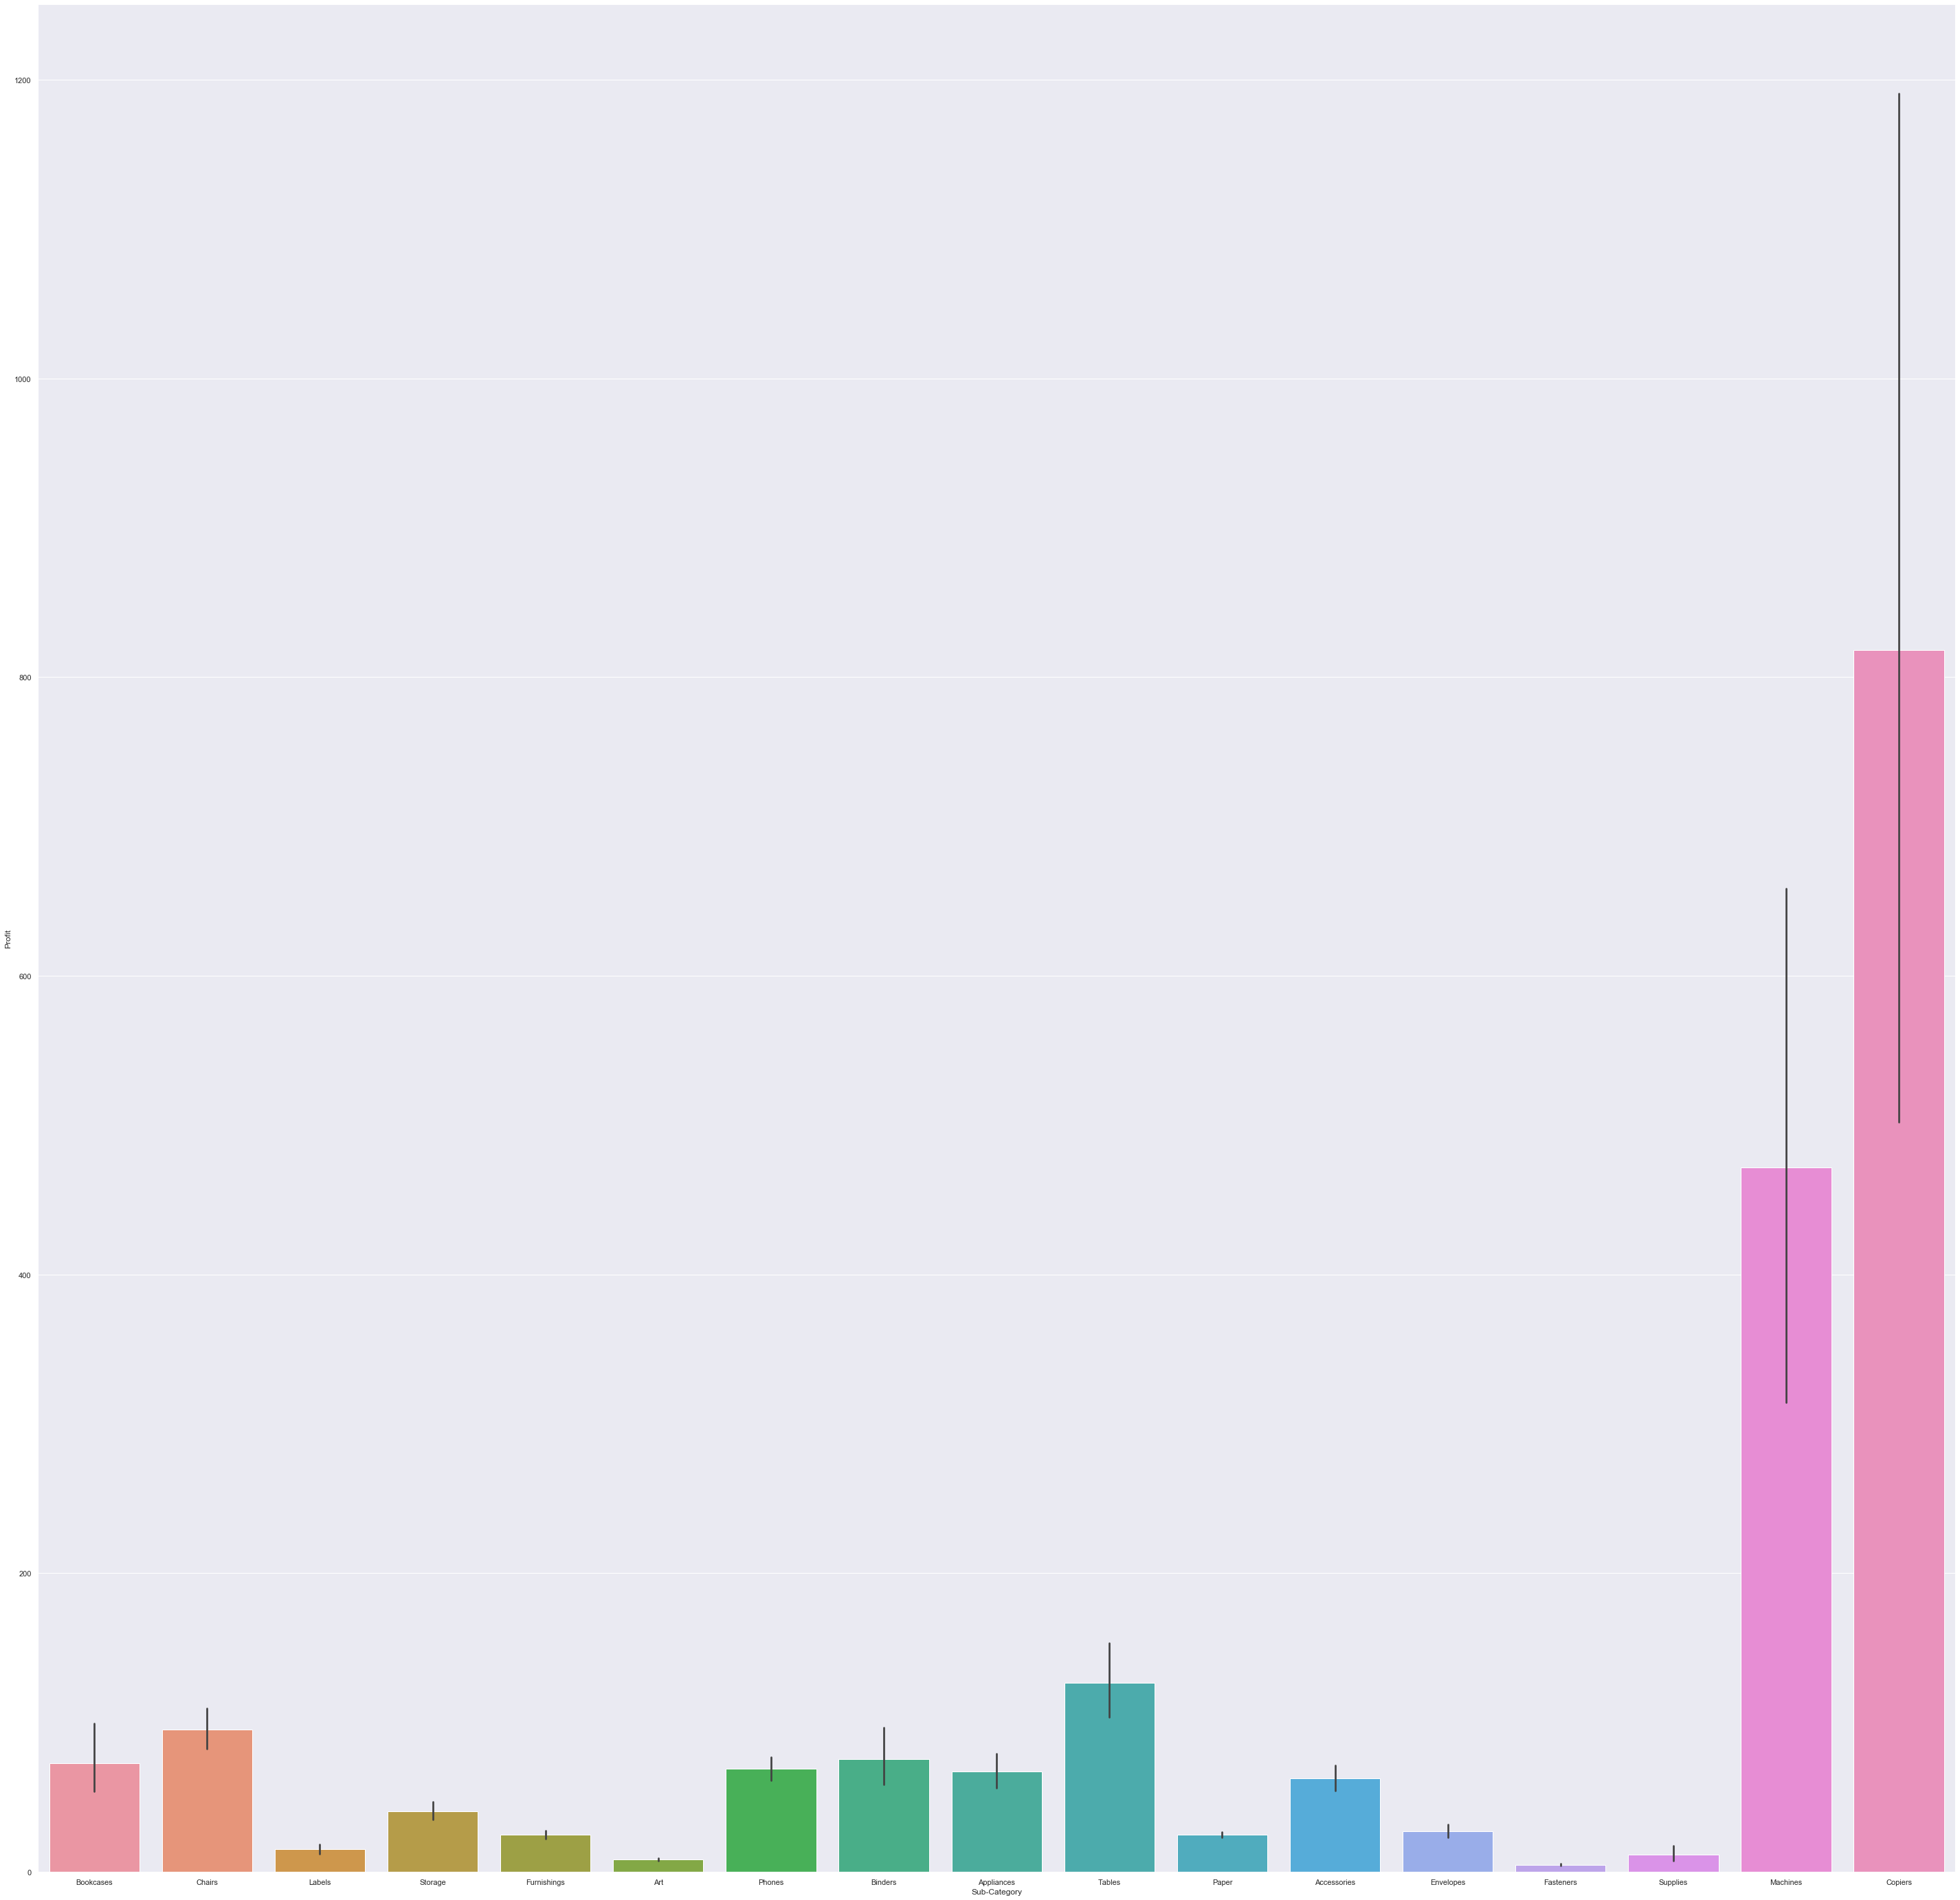

In [13]:
plt.figure(figsize=(50,50))
sns.barplot(x='Sub-Category', y='Profit', data = df1)

Now we can say that __Copiers__ is having more profits followed by _Machines_ and _Tables_.

And also we can see that __Art, Fasteners__ and __Supplies__ have very less profit. So its better that sellers doesn't invest in these areas

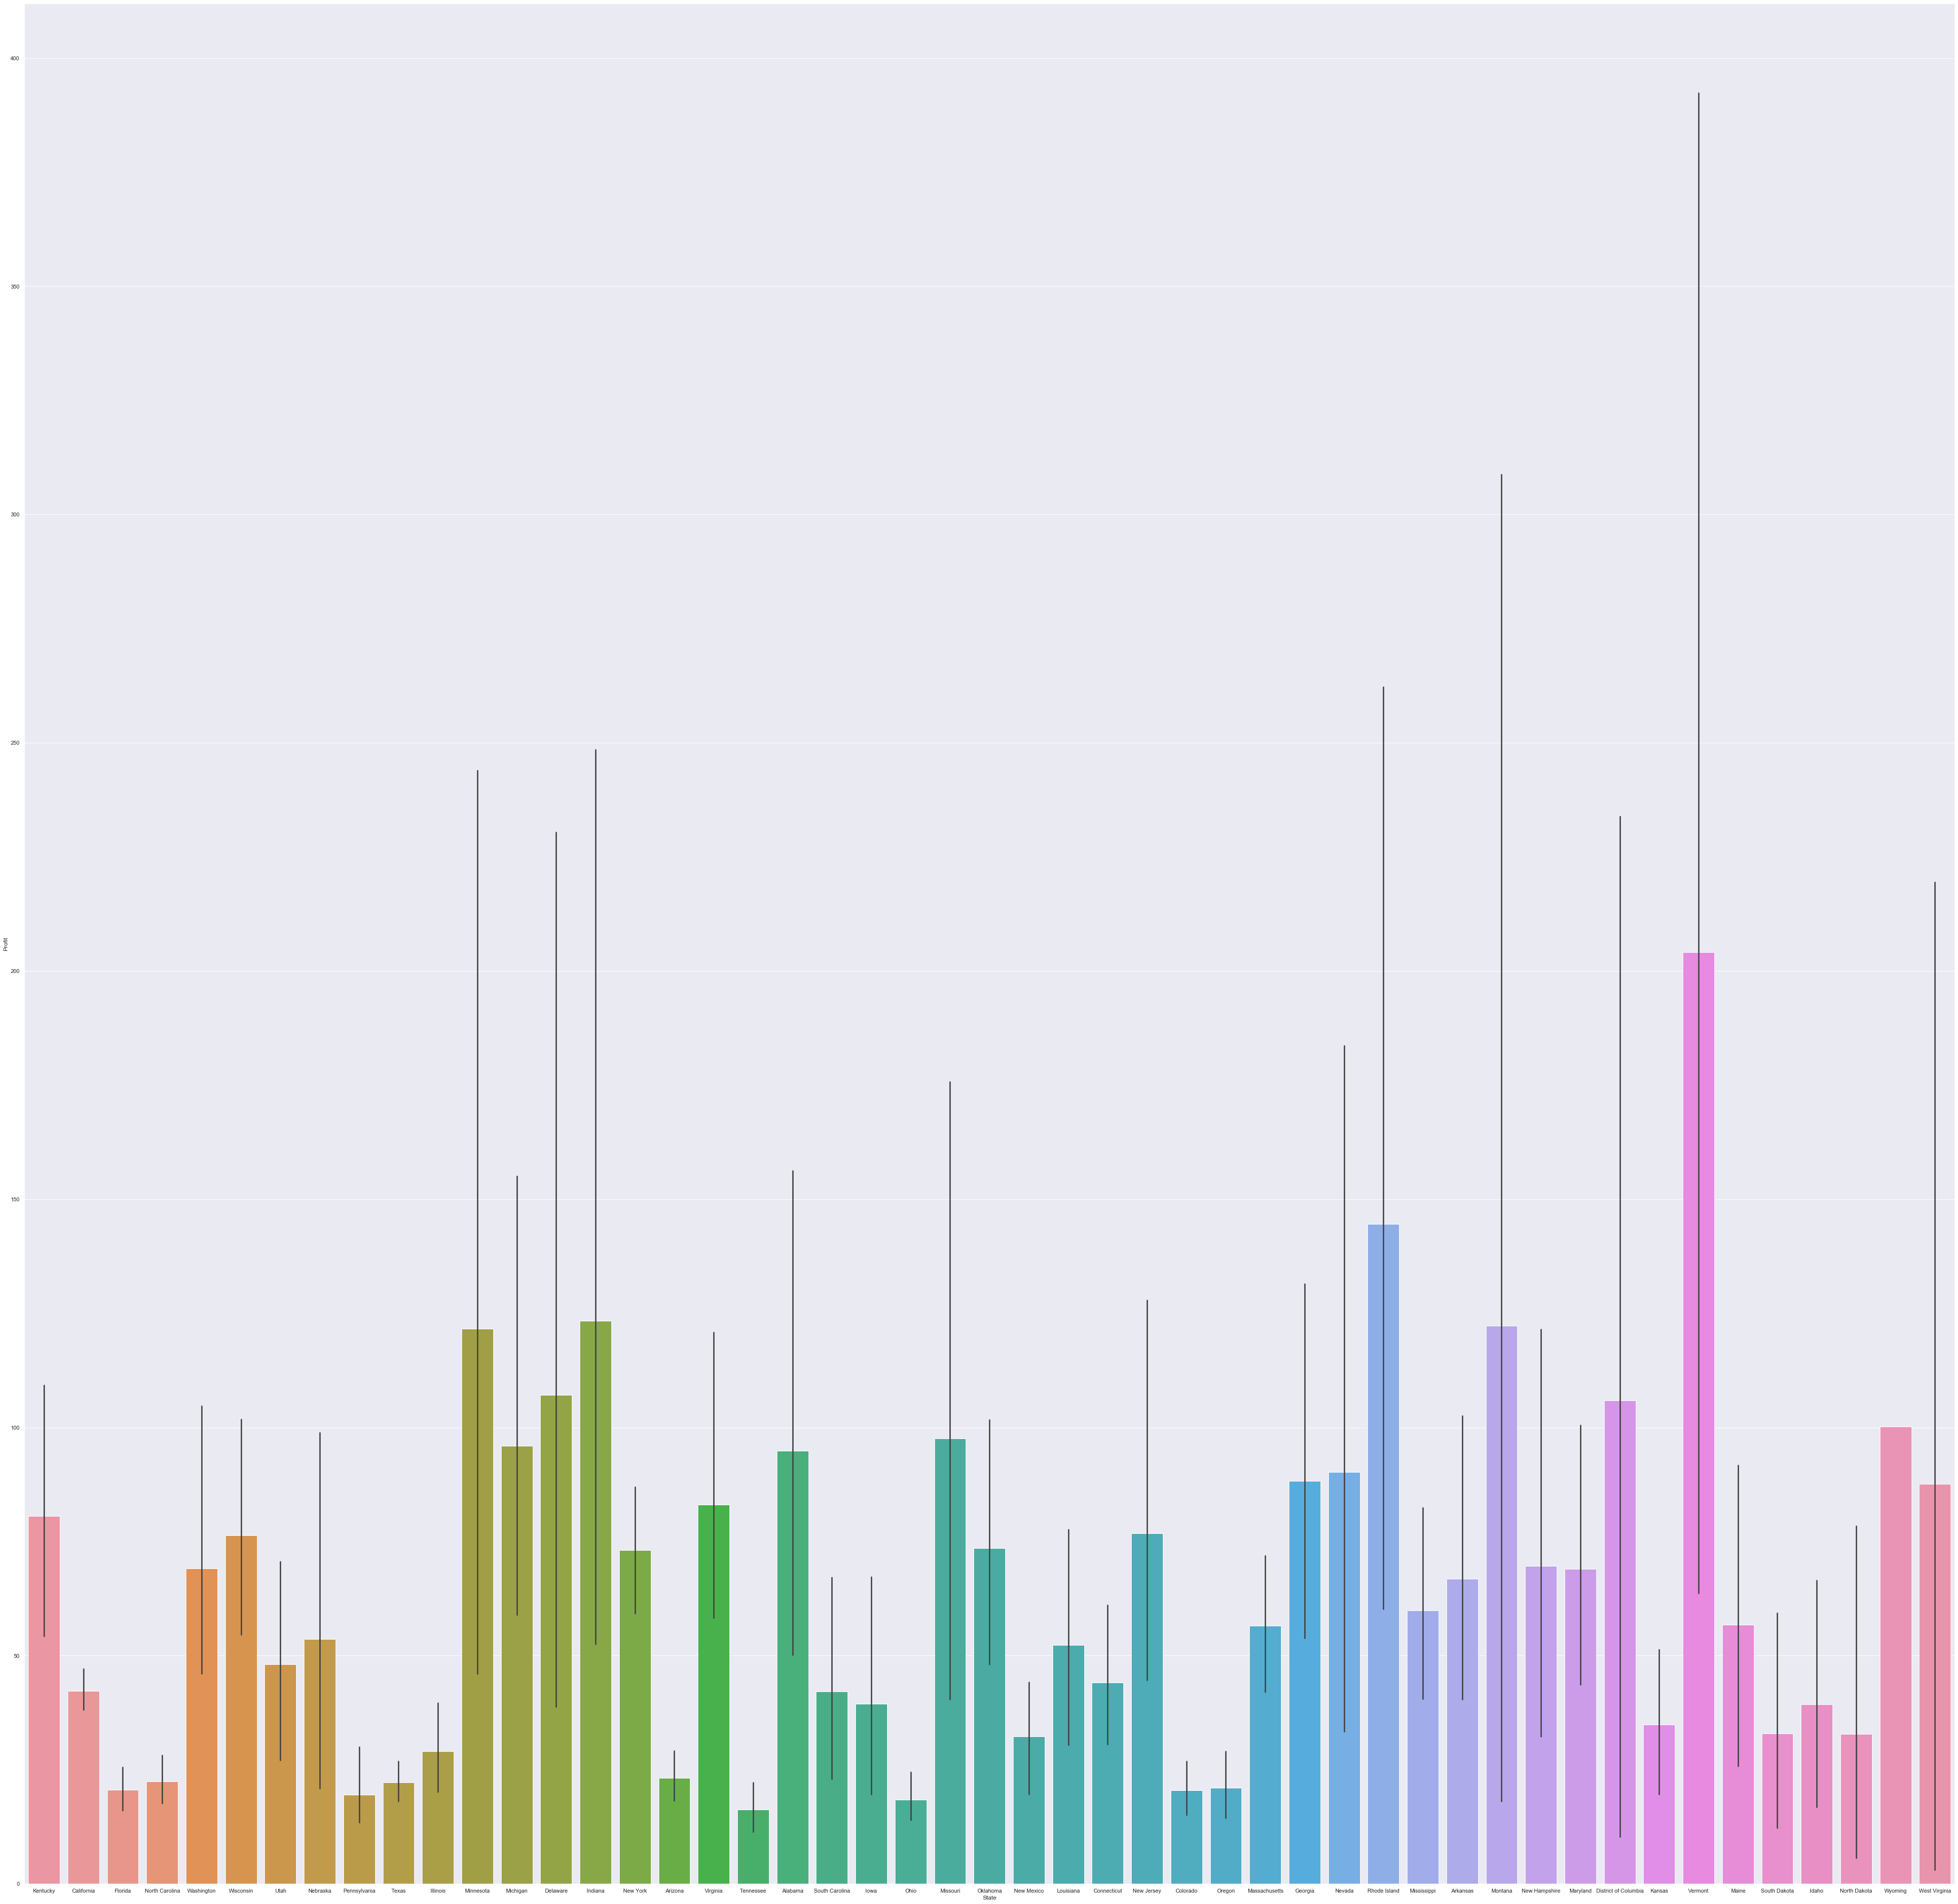

In [14]:
plt.figure(figsize=(70,70))
sns.barplot(x='State', y='Profit', data = df1)

We can see that Vermont state is having higher profits than any other state in USA, which is followed by Rhode Island, Indiana and Minnesota. 

The states with low profits are Tennesse, Florida, Ohio,Arizona.

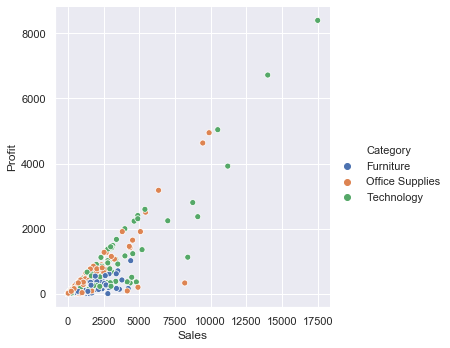

In [15]:
sns.relplot(x='Sales', y='Profit',hue='Category', data = df1)

From above graph we can see that Technology has highest number of sales and profits too followed by Office Supplies

Now we need to check what made people buy more Technology related products. Is discount factor having any effect on it? or they are buying more quantity in number? Lets check

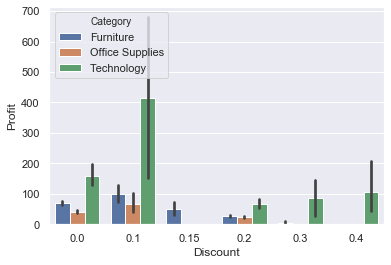

In [16]:
sns.barplot(x='Discount',y='Profit', hue='Category', data = df1)

As from above graph we can say that Discount is having no effect on Profits. As people are buying more technology related products at 0% discount even. But we can see that the sales of technology related products are sky rocketed with even 10% discount. Sales of furniture products have also increased with increase in discount, but they are negligible when compared to technology

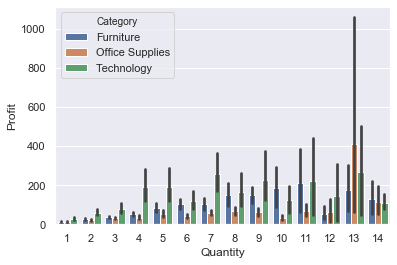

In [17]:
sns.barplot(x='Quantity',y='Profit',hue='Category', data = df1)

I can see that there is no effect of quantity on it, as the graph is very disordered.

### Final Analysis and Business Problems in the sales

__What needs to be done for making more Profit__

From the above analysis it can be seen that Customers are more attracted to buying technology related stuff rather than going for Office Supplies. So for business to grow and gain more profits, they should invest more in technology related items followed by Office Supplies. But when it comes to Furniture related products, the sales and profits are very less. So people should not invest in them and they should invest in technology and Office Supplies products.

Now if we compare states w.r.t to profits, State of Vermont has made more profits followed by Rhode Island, Minnesota and Indiana. And there are few states with low profits viz, Tennesse, Ohio, Florida and Arizona etc. So I suggest business to move their business from the states with low profits to those states where they can get more profits. 

And apart from this, it can be seen that Discount factor has very less effect on Profit as people are buying more products even at less discounts. So I suggest not to increase he discount as it will have no effect.

### END OF TASK